In [1]:
import os
import platform
import tensorflow as tf

from datetime import datetime
now = datetime.now()

#########################################################################################################################################################
# PARAMETROS DEFINIDOS EN FUNCION DEL USUARIO
#########################################################################################################################################################

# Ruta relativa hacia la librería ai4eutils
ai4eutils_relative = "./repos/ai4eutils"

# Ruta relativa hacia la librería CameraTraps
CameraTraps_relative = "./repos/CameraTraps"

modules_relative = "./modules"

# Ruta relativa hacia carpeta de JSON con los datos de entrada
output_json_path_relative = './output_json'

# Ruta relativa hacia la carpeta destino de los ficheros JSON:
output_img_path_relative = ('./output_img')


#########################################################################################################################################################
#########################################################################################################################################################

home = os.path.expanduser("~")

ai4utils = os.path.abspath(ai4eutils_relative)
CameraTraps = os.path.abspath(CameraTraps_relative)
modules = os.path.abspath(modules_relative)
output_json = os.path.abspath(output_json_path_relative)
output_img = os.path.abspath(output_img_path_relative)

try:
    os.environ['PYTHONPATH']
except KeyError:
    os.environ['PYTHONPATH'] = ""
if platform.system() == 'Windows':
    os.environ['PYTHONPATH'] += (";" + ai4utils)
    os.environ['PYTHONPATH'] += (";" + CameraTraps)
    os.environ['PYTHONPATH'] += (";" + modules)
else:
    os.environ['PYTHONPATH'] += (":" + ai4utils)
    os.environ['PYTHONPATH'] += (":" + CameraTraps)
    os.environ['PYTHONPATH'] += (":" + modules)

print('=======================================================================================================================================')
print('PYTHONPATH: ' + os.environ['PYTHONPATH'])
print('ai4eutils PATH: ' + '\t' + ai4utils)
print('CameraTraps PATH: ' + '\t' + CameraTraps)
print('output_json PATH: ' + '\t' + output_json)
print('output_img PATH: ' + '\t' + output_img)
print('=======================================================================================================================================')

2022-06-30 19:39:15.562567: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


PYTHONPATH: /home/carlos/.vscode/extensions/ms-toolsai.jupyter-2022.5.1001601848/pythonFiles:/home/carlos/.vscode/extensions/ms-toolsai.jupyter-2022.5.1001601848/pythonFiles/lib/python:/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils:/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps:/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/modules
ai4eutils PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils
CameraTraps PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps
output_json PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_json
output_img PATH: 	/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img


In [2]:
!python ./modules/genera_bboxes.py --input_dir "$output_json" --output_dir "$output_img"

  0%|                                                    | 0/10 [00:00<?, ?it/s]detection_categories provided
detection_categories provided
detection_categories provided
detection_categories provided
 40%|█████████████████▌                          | 4/10 [00:00<00:00, 37.87it/s]detection_categories provided
detection_categories provided
detection_categories provided
detection_categories provided
 80%|███████████████████████████████████▏        | 8/10 [00:00<00:00, 38.29it/s]detection_categories provided
detection_categories provided
100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 39.48it/s]


  0%|          | 0/10 [00:00<?, ?it/s]

/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/3.jpg


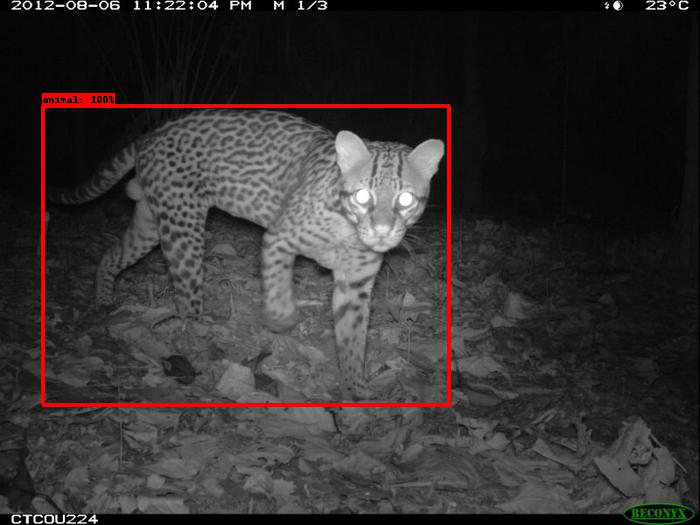


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/1.jpg


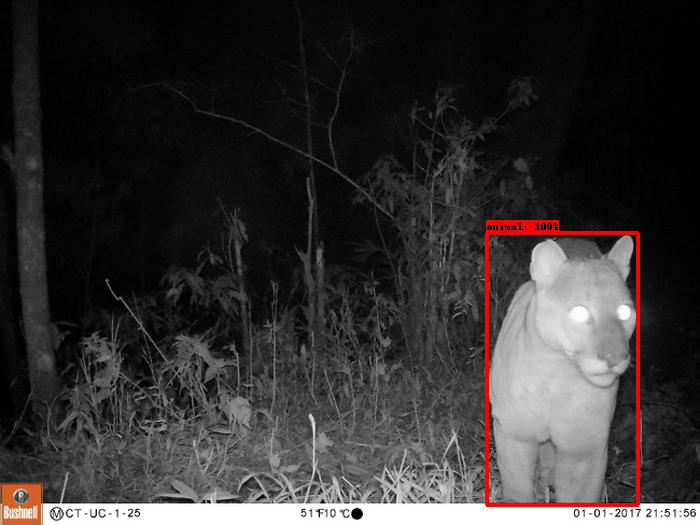

 20%|██        | 2/10 [00:00<00:00, 12.76it/s]


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/9.jpg


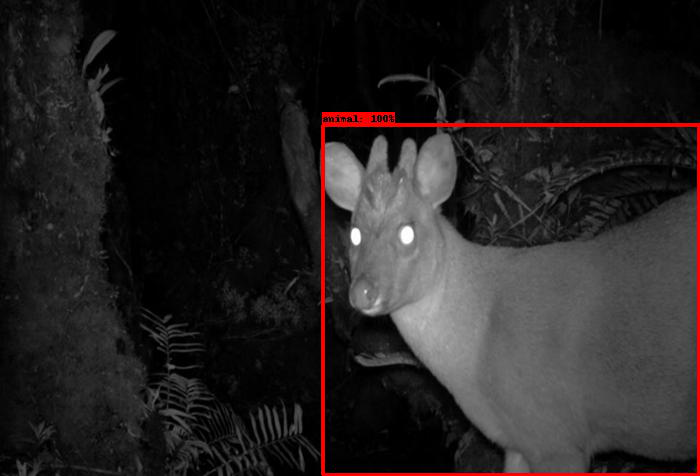


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/6.jpg


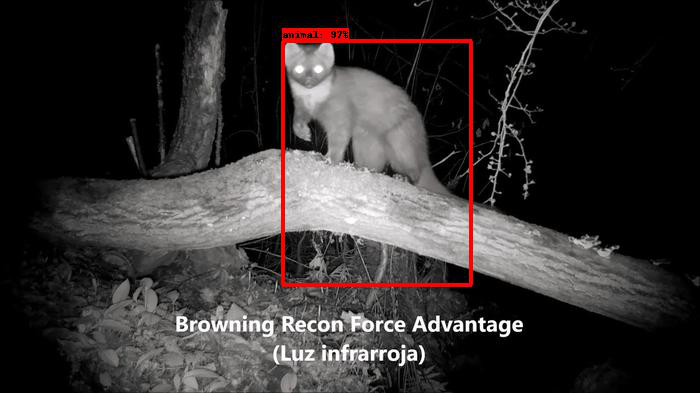

 40%|████      | 4/10 [00:00<00:00, 12.86it/s]


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/2.jpg


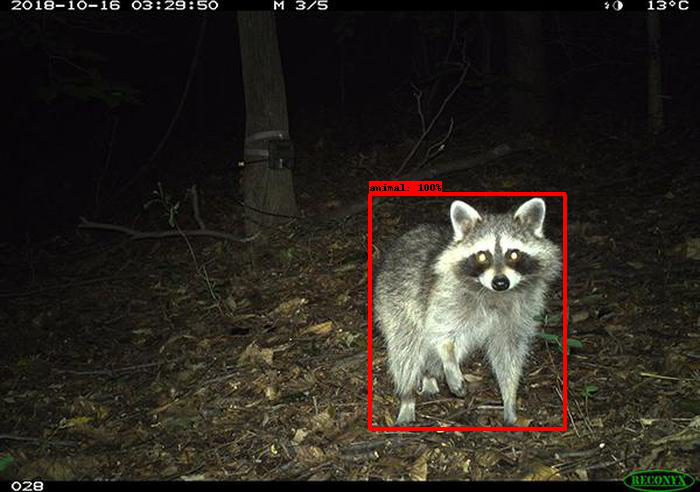


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/4.jpg


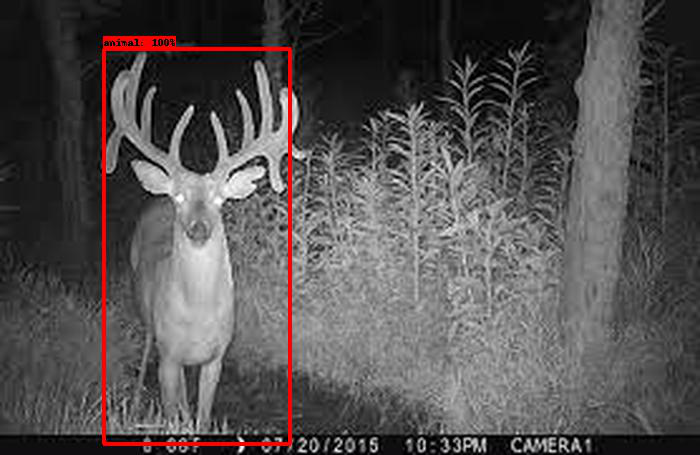

 60%|██████    | 6/10 [00:00<00:00, 11.70it/s]


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/10.jpg


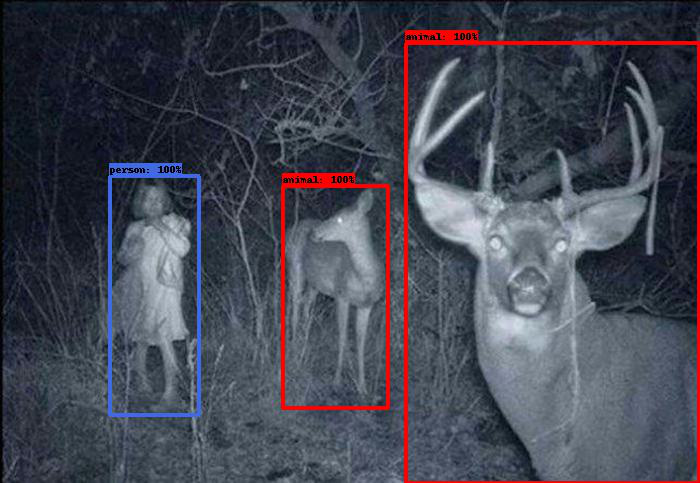


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/8.jpg


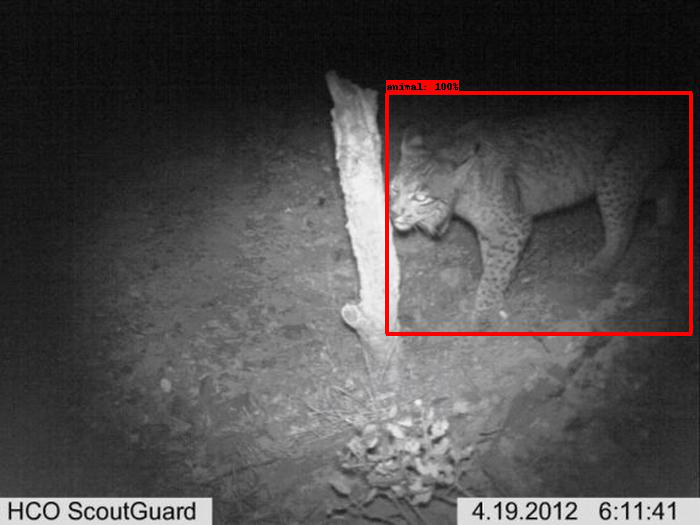

 80%|████████  | 8/10 [00:00<00:00, 10.57it/s]


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/7.jpg


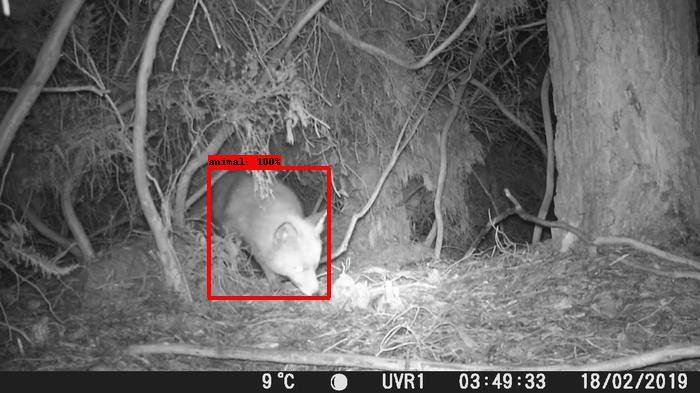


/home/carlos/WORKSPACE/TFG-DeteccionFototrampeo/output_img/5.jpg


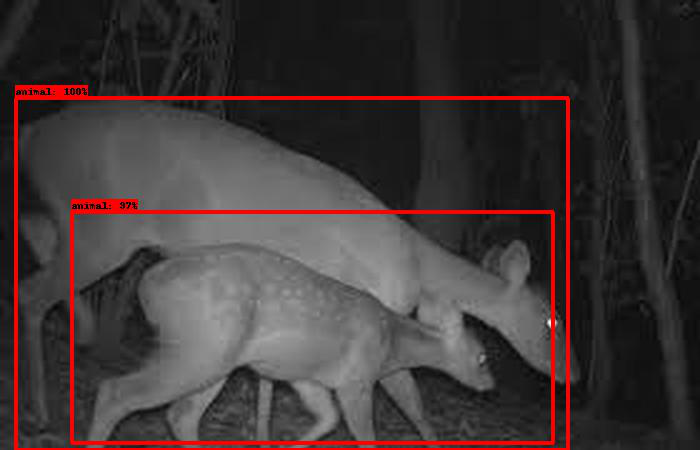

100%|██████████| 10/10 [00:00<00:00, 11.53it/s]

In [3]:
import os
import glob
from PIL import Image
from tqdm import tqdm

image_extensions = ['.jpg', '.jpeg', '.gif', '.png']

def is_image_file(s):
    """
    Compara la extesión de un archivo con las extensiones admitadas en 
    image_extensions.
    """
    ext = os.path.splitext(s)[1]
    return ext.lower() in image_extensions

def find_image_files(strings):
    """
    Devuelve una lista de nombres candidatos a ser ficheros de imágenes. Para los 
    nombres busca a partir de las extensiones incluidas en image_extension.
    """
    return [s for s in strings if is_image_file(s)]

def find_images(dir_name):
    """
    Busca todos los ficheros que parecen imagénes dentro de un directorio.
    """
    strings = glob.glob(os.path.join(dir_name, '*.*'))

    image_strings = find_image_files(strings)

    return image_strings

image_file_names = find_images(output_img)

for image_file in tqdm(image_file_names):
  print(image_file)
  im = Image.open(image_file)
  display(im)
  print('')